In [1]:
from alethia import (
    alethia,
    get_embeddings,
    load_sentence_transformer,
    do_pca,
    plot_embedding,
)

import pandas as pd

In [2]:
df = pd.read_csv(
    "~/github/pranav-alethia/notebooks/data_district_mappings/India_district_mappings - Sheet1.csv"
)
df

,State,1951,1961,1971,1981,1991,2001
0,Andaman and Nicobar Islands,Andaman and Nicobar,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands
1,Andaman and Nicobar Islands,Andaman and Nicobar,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman,Andaman,Andaman
2,Andaman and Nicobar Islands,Andaman and Nicobar,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Nicobar,Nicobar,Nicobar
3,Andhra Pradesh,Srikakulam,Srikakulam,Srikakulam,Srikakulam,Srikakulam,Srikakulam
4,Andhra Pradesh,Srikakulam,Srikakulam,Srikakulam,Vizianagaram,Vizianagaram,Vizianagaram
...,...,...,...,...,...,...,...
631,West Bengal,Burdwan,Burdwan,Burdwan,Burdwan,Burdwan,Burdwan
632,West Bengal,Birbhum,Birbhum,Birbhum,Birbhum,Birbhum,Birbhum
633,West Bengal,Bankura,Bankura,Bankura,Bankura,Bankura,Bankura
634,West Bengal,Midnapur,Midnapore,Midnapore,Midnapore,Midnapore,Midnapore


In [3]:
load_sentence_transformer

<function alethia.alethia.load_sentence_transformer(model_name, force_cpu=False, **kwargs)>

In [6]:
model = load_sentence_transformer("epfl-llm/meditron-7b")

Loading model epfl-llm/meditron-7b


No sentence-transformers model found with name epfl-llm/meditron-7b. Creating a new one with mean pooling.


config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/1.91G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/1.92G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/1.84G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/1.84G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/1.90G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/1.90G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/262M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/4.08k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.85M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/344 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/736 [00:00<?, ?B/s]

GPU memory error: CUDA out of memory. Tried to allocate 172.00 MiB. GPU 0 has a total capacity of 47.41 GiB of which 111.00 MiB is free. Process 3250529 has 26.82 GiB memory in use. Including non-PyTorch memory, this process has 15.49 GiB memory in use. Of the allocated memory 15.23 GiB is allocated by PyTorch, and 3.14 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)
Trying to load model on CPU instead...
No sentence-transformers model found with name epfl-llm/meditron-7b. Creating a new one with mean pooling.


Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

Successfully loaded model epfl-llm/meditron-7b on CPU


In [7]:
embeddings = get_embeddings(
    df["State"].unique().tolist(), model=model, show_progress=True
)

Generating Embeddings: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [10:49<00:00, 22.38s/it]


In [8]:
pca = do_pca(embeddings, n_components=2)

In [9]:
pca[0]

array([[ 0.15936376, -0.6134368 ,  0.05330739, ..., -0.21622325,
         1.6286987 , -0.40526837],
       [ 0.665168  , -1.289527  ,  0.2262425 , ...,  0.13693042,
         1.1075162 ,  1.0048565 ],
       [ 0.50081307, -1.8001066 , -0.63118935, ..., -0.25330603,
         0.72109073,  0.800615  ],
       ...,
       [ 0.0519045 , -0.8872563 , -0.05577608, ...,  0.08429834,
         0.93490976,  1.1017805 ],
       [-0.62678665, -0.68614227,  0.46198535, ..., -0.36183393,
         0.54093045,  0.40502897],
       [ 0.19725549, -0.85217047,  1.4354706 , ..., -0.45242488,
         1.1720406 ,  0.24196145]], shape=(29, 4096), dtype=float32)

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


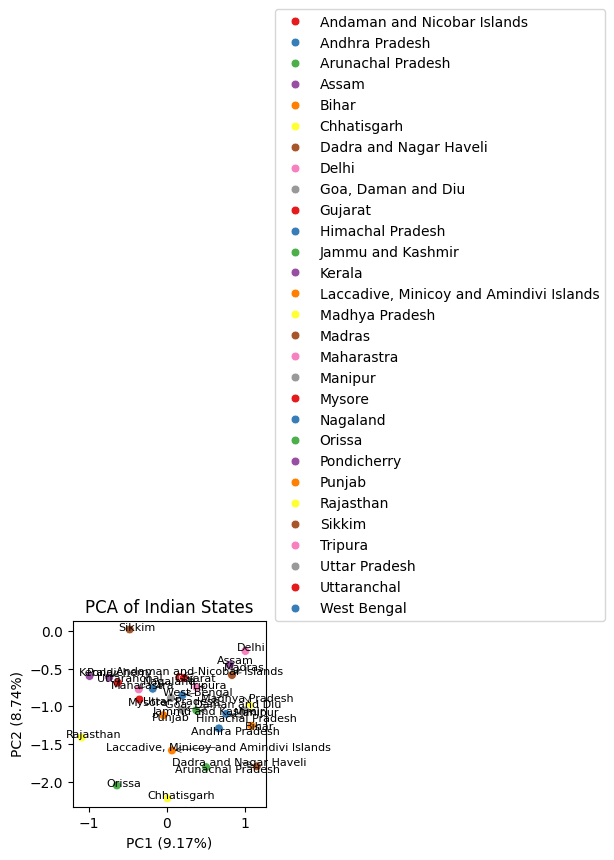

In [10]:
plot_embedding(
    X=pca[0],
    labels=df["State"].unique().tolist(),
    title="PCA of Indian States",
    explained_var=pca[1],
    label=True,
    repel=True,
)